In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
from scipy import ndimage
import re
import glob

from astropy.utils.data import get_file_contents
import astropy.units as u

%matplotlib inline
from IPython.utils import io

/home/wtgee/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Load the PANOPTES module dir
import sys
sys.path.append('../..')

# For development
%load_ext autoreload
%autoreload 2

from panoptes.utils.images import *

INFO:PanoptesLogger:

INFO:PanoptesLogger:********************************************************************************
INFO:PanoptesLogger:

DEBUG:PanoptesLogger:Adding warning logging to: PanError
DEBUG:PanoptesLogger:Adding warning logging to: SerialData
DEBUG:PanoptesLogger:Adding warning logging to: PanStateMachine
DEBUG:PanoptesLogger:Adding warning logging to: AbstractCamera
DEBUG:PanoptesLogger:Adding warning logging to: Observation
DEBUG:PanoptesLogger:Adding warning logging to: Target
DEBUG:PanoptesLogger:Adding warning logging to: Scheduler
DEBUG:PanoptesLogger:Adding warning logging to: Observatory
DEBUG:PanoptesLogger:Adding warning logging to: Panoptes
DEBUG:PanoptesLogger:Adding warning logging to: Messaging
DEBUG:PanoptesLogger:Adding warning logging to: EnvironmentalMonitor
DEBUG:PanoptesLogger:Adding warning logging to: Webcams
DEBUG:PanoptesLogger:Adding warning logging to: PanSensors


In [24]:
cr2_files = glob.glob('/home/wtgee/Desktop/*.cr2')
cr2_files.sort()

In [4]:
pixel_scale = ((206.265) * (18.5 * u.micron) / (85 * u.mm)).cgs * u.arcsecond

In [5]:
def compare(f0, f1, pixel_scale=0.):
    raw_data_00 = read_pgm(cr2_to_pgm(f0))
    raw_data_01 = read_pgm(cr2_to_pgm(f1))

    
    x0, y0 = measure_offset(raw_data_00,raw_data_01, box_width=200)
    
    with io.capture_output() as captured:    
        !/var/panoptes/bin/measure_offset $f0 $f1 
        
    x1 = float(get_file_contents('xcent.txt'))
    y1 = float(get_file_contents('ycent.txt'))

    return ( x0, y0, x1, y1 )

In [7]:
comparison = {}

for i in np.arange(len(cr2_files)):
    if i < len(cr2_files) - 1:
        comparison[i] = compare(cr2_files[i], cr2_files[i+1], pixel_scale)

0
1
2
3
4
5
6
7


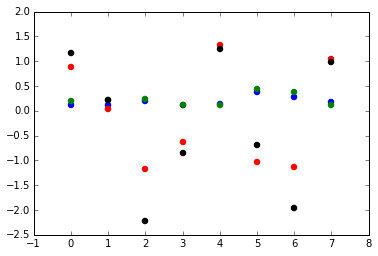

In [23]:
x0 = [v[0] for v in comparison.values()]
y0 = [v[1] for v in comparison.values()]
x1 = [v[2] for v in comparison.values()]
y1 = [v[3] for v in comparison.values()]

r = np.arange(len(comparison))

plt.scatter(r, x0, color='b', linewidths=2.)
plt.scatter(r, y0, color='r', linewidths=2.)
plt.scatter(r, x1, color='g', linewidths=2.)
plt.scatter(r, y1, color='k', linewidths=2.)